In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import warnings
from pandas_profiling import ProfileReport
warnings.filterwarnings( "ignore" )

In [2]:
df_charges = pd.read_csv('charges_data.csv')

In [3]:
df_charges.head()

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   tenure            7032 non-null   int64  
 2   contract          7032 non-null   object 
 3   paperlessBilling  7032 non-null   object 
 4   paymentMethod     7032 non-null   object 
 5   monthlyCharges    6577 non-null   float64
 6   totalCharges      6577 non-null   float64
 7   churn             7032 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 439.6+ KB


In [5]:
df_charges.isnull().sum()

customerID            0
tenure                0
contract              0
paperlessBilling      0
paymentMethod         0
monthlyCharges      455
totalCharges        455
churn                 0
dtype: int64

In [6]:
df_charges.paymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [7]:
df_charges.contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
df_charges.describe(include='object').T

,count,unique,top,freq
customerID,7032,7032,3726-TBHQT,1
contract,7032,3,Month-to-month,3875
paperlessBilling,7032,2,Yes,4168
paymentMethod,7032,4,Electronic check,2365
churn,7032,2,No,5163


In [12]:
df_charges.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.00,29.00,55.00,72.00
monthlyCharges,6577.0,64.654637,30.101974,18.25,35.25,70.30,89.85,118.75
totalCharges,6577.0,2274.584719,2263.042489,18.80,399.45,1389.85,3775.85,8684.80


In [13]:
#df_charges.drop(['contract'],axis=1,inplace=True)

In [14]:
df_personal = pd.read_csv('personal_data.csv')
df_personal.head()

,customerID,gender,partner,dependents,age
0,5575-GNVDE,Male,No,No,41
1,3668-QPYBK,Male,No,No,58
2,7795-CFOCW,Male,No,No,61
3,9237-HQITU,Female,No,No,66
4,9305-CDSKC,Female,No,No,87


In [15]:
df_personal.isnull().sum()

customerID    0
gender        0
partner       0
dependents    0
age           0
dtype: int64

In [16]:
df_personal.drop(['partner','dependents'],axis=1,inplace=True)

In [17]:
df_plan = pd.read_csv('plan_data.csv')
df_plan.head()

,customerID,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies
0,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
1,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
2,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No
3,1452-KIOVK,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
4,6713-OKOMC,No,No phone service,DSL,Yes,No,No,No,No,No


In [18]:
df_plan.isnull().sum()

customerID          0
phoneService        0
multipleLines       0
internetService     0
onlineSecurity      0
onlineBackup        0
deviceProtection    0
techSupport         0
streamingTV         0
streamingMovies     0
dtype: int64

In [19]:
df_personal.head()

,customerID,gender,age
0,5575-GNVDE,Male,41
1,3668-QPYBK,Male,58
2,7795-CFOCW,Male,61
3,9237-HQITU,Female,66
4,9305-CDSKC,Female,87


In [20]:
df_personal.shape

(5283, 3)

In [21]:
merged_df = pd.merge(df_charges, df_personal, on="customerID")
merged_df.head()

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn,gender,age
0,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.50,No,Male,41
1,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,58
2,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,61
3,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,66
4,9305-CDSKC,8,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Female,87


In [22]:
merged_df.isnull().sum()

customerID            0
tenure                0
contract              0
paperlessBilling      0
paymentMethod         0
monthlyCharges      352
totalCharges        352
churn                 0
gender                0
age                   0
dtype: int64

In [23]:
df_monthlyCharges = merged_df[merged_df['monthlyCharges'].notnull()]
df_monthlyCharges.sort_values(by=['monthlyCharges'])
trim_mean =stats.trim_mean(df_monthlyCharges['monthlyCharges'], 0.1).round()

In [24]:
merged_df['monthlyCharges'].replace(np.nan, trim_mean, inplace= True)

In [25]:
merged_df['totalCharges'] = merged_df['monthlyCharges']*merged_df['tenure']

In [26]:
merged_df.isnull().sum()

customerID          0
tenure              0
contract            0
paperlessBilling    0
paymentMethod       0
monthlyCharges      0
totalCharges        0
churn               0
gender              0
age                 0
dtype: int64

In [27]:
merged_df = pd.merge(merged_df,df_plan, on='customerID')
merged_df.head()

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn,gender,age,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies
0,5575-GNVDE,34,One year,No,Mailed check,56.95,1936.3,No,Male,41,Yes,No,DSL,Yes,No,Yes,No,No,No
1,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1903.5,No,Male,61,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
2,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,141.4,Yes,Female,66,Yes,No,Fiber optic,No,No,No,No,No,No
3,1452-KIOVK,22,Month-to-month,Yes,Credit card (automatic),89.10,1960.2,No,Male,39,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
4,6713-OKOMC,10,Month-to-month,No,Mailed check,29.75,297.5,No,Female,39,No,No phone service,DSL,Yes,No,No,No,No,No


In [28]:
merged_df.isnull().sum()

customerID          0
tenure              0
contract            0
paperlessBilling    0
paymentMethod       0
monthlyCharges      0
totalCharges        0
churn               0
gender              0
age                 0
phoneService        0
multipleLines       0
internetService     0
onlineSecurity      0
onlineBackup        0
deviceProtection    0
techSupport         0
streamingTV         0
streamingMovies     0
dtype: int64

In [29]:
merged_df.columns

Index(['customerID', 'tenure', 'contract', 'paperlessBilling', 'paymentMethod',
       'monthlyCharges', 'totalCharges', 'churn', 'gender', 'age',
       'phoneService', 'multipleLines', 'internetService', 'onlineSecurity',
       'onlineBackup', 'deviceProtection', 'techSupport', 'streamingTV',
       'streamingMovies'],
      dtype='object')

In [ ]:
#cols = ['churn','phoneService','onlineSecurity','onlineBackup',
#        'deviceProtection','techSupport','streamingMovies','streamingTV',
#        'paperlessBilling','multipleLines','gender']
#for col in cols:
#    merged_df[col] = merged_df[col].replace('Yes',1)
#    merged_df[col] = merged_df[col].replace('No',0)
#    merged_df[col] = merged_df[col].replace('No phone service',0)
#    merged_df[col] = merged_df[col].replace('Male',1)
#    merged_df[col] = merged_df[col].replace('Female',0)
#    merged_df[col] = merged_df[col].replace('No internet service',0)

# pandas profiler

In [ ]:
profile = ProfileReport(merged_df)
profile.to_notebook_iframe()

In [ ]:
# write to file
profile.to_file("churn-profile.html")

In [ ]:
merged_df.head()

In [ ]:
merged_df.tenure.plot(kind='hist')

In [ ]:
merged_df.tenure.plot(kind='box')

In [ ]:
merged_df.monthlyCharges.plot(kind='hist')

In [ ]:
merged_df.monthlyCharges.plot(kind='box')

In [ ]:
merged_df.totalCharges.plot(kind='hist')

In [ ]:
merged_df.totalCharges.plot(kind='box')

In [ ]:
merged_df.age.plot(kind='box')

In [ ]:
merged_df.age.plot(kind='hist')

In [ ]:
merged_df.paymentMethod.unique()

In [ ]:
merged_df.internetService.unique()

In [ ]:
merged_df.info()

In [ ]:
merged_df.drop('customerID',axis=1,inplace=True)

In [ ]:
#merged_df = pd.get_dummies(merged_df)

In [ ]:
merged_df.head()

In [ ]:
merged_df.columns

In [ ]:
merged_df.churn.value_counts()

In [ ]:
# Create a list of float colums to check for skewing
mask = merged_df.dtypes == np.float
float_cols = merged_df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = merged_df[float_cols].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

In [ ]:
# Choose a field
field = "totalCharges"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
merged_df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
merged_df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [ ]:
merged_df.totalCharges = np.log1p(merged_df.totalCharges)

In [ ]:
X = merged_df[['tenure','totalCharges','age','monthlyCharges','churn']]
#sns.pairplot(X, corner=True)
sns.pairplot(X, corner=True, hue='churn')

In [ ]:
corr = X.corr()
fig, ax = plt.subplots(figsize=(40,30)) 
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cbar = True, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, mask=mask,ax=ax)

In [ ]:
X_cat = merged_df[['paperlessBilling','gender', 'phoneService', 'multipleLines', 'onlineSecurity',
       'onlineBackup', 'deviceProtection', 'techSupport', 'streamingTV','streamingMovies', 
       'paymentMethod_Bank transfer (automatic)','paymentMethod_Credit card (automatic)',
       'paymentMethod_Electronic check', 'paymentMethod_Mailed check',
       'internetService_DSL', 'internetService_Fiber optic','internetService_No','churn']]
corr = X_cat.corr()
fig, ax = plt.subplots(figsize=(40,30)) 
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cbar = True, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, mask=mask,ax=ax)

In [ ]:
merged_df.to_csv('Final_dataset.csv')

# Model Training
1. Logistic Regression
2. Bagging
3. KNN

# KNN

In [325]:
import colorsetup
from colorsetup import colors, palette

In [326]:
df = merged_df.copy()
df.head()

,customerID,tenure,contract,paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn,gender,age,phoneService,multipleLines,internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies
0,5575-GNVDE,34,One year,No,Mailed check,56.95,1936.3,No,Male,41,Yes,No,DSL,Yes,No,Yes,No,No,No
1,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1903.5,No,Male,61,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
2,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,141.4,Yes,Female,66,Yes,No,Fiber optic,No,No,No,No,No,No
3,1452-KIOVK,22,Month-to-month,Yes,Credit card (automatic),89.10,1960.2,No,Male,39,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
4,6713-OKOMC,10,Month-to-month,No,Mailed check,29.75,297.5,No,Female,39,No,No phone service,DSL,Yes,No,No,No,No,No


In [327]:
round(df.describe(),2)

,tenure,monthlyCharges,totalCharges,age
count,3537.00,3537.00,3537.00,3537.00
mean,33.10,65.03,2329.98,54.88
std,24.72,29.31,2259.26,19.99
min,1.00,18.25,18.80,20.00
25%,9.00,42.10,413.70,38.00
50%,30.00,69.00,1435.50,55.00
75%,56.00,89.40,3898.80,72.00
max,72.00,118.75,8550.00,90.00


In [328]:
df.drop('customerID',axis=1, inplace=True)

In [329]:
cols = ['onlineSecurity','onlineBackup','deviceProtection','techSupport',
        'streamingMovies','streamingTV','multipleLines']
for col in cols:
    df[col] = df[col].replace('No internet service','No')
    df[col] = df[col].replace('No phone service','No')

In [330]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
tenure,72
contract,3
paperlessBilling,2
paymentMethod,4
monthlyCharges,1225
totalCharges,3097
churn,2
gender,2
age,71


In [331]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['paperlessBilling',
 'churn',
 'gender',
 'phoneService',
 'multipleLines',
 'onlineSecurity',
 'onlineBackup',
 'deviceProtection',
 'techSupport',
 'streamingTV',
 'streamingMovies']

In [332]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['contract', 'paymentMethod', 'internetService']

In [333]:
[[i, list(df[i].unique())] for i in categorical_variables]

[['contract', ['One year', 'Month-to-month', 'Two year']],
 ['paymentMethod',
  ['Mailed check',
   'Bank transfer (automatic)',
   'Electronic check',
   'Credit card (automatic)']],
 ['internetService', ['DSL', 'Fiber optic', 'No']]]

In [334]:
ordinal_variables = ['contract']

In [335]:
df['tenure'].unique()

array([34, 45,  2, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21,  1,
       17,  5, 46, 11, 70, 43,  8, 60, 63, 66, 72,  3, 47, 35, 48, 29, 30,
       12, 68, 32, 55, 37, 64, 36, 41, 56,  6,  4, 33, 27, 67, 61, 14, 20,
       53, 15, 24, 19, 23, 31, 18, 65, 42, 57, 38, 54,  9,  7, 44, 51, 40,
       39, 50, 26, 59], dtype=int64)

In [336]:
ordinal_variables.append('tenure')

In [337]:
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'totalCharges'}>],
       [<AxesSubplot:title={'center':'monthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

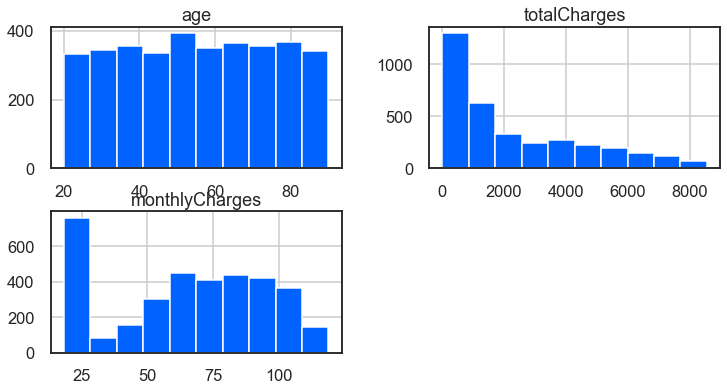

In [338]:
df[numeric_variables].hist(color=colors[0], figsize=(12, 6))

In [339]:
df['tenure'] = pd.cut(df['tenure'], bins=5)

In [340]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [341]:
lb, le = LabelBinarizer(), LabelEncoder()

In [342]:
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

In [343]:
df[ordinal_variables].astype('category').describe()

,contract,tenure
count,3537,3537
unique,3,5
top,0,0
freq,1922,1205


In [344]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [345]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))

In [346]:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [347]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3537.0,1.781453,1.602464,0.00,0.0,2.0,3.0,4.00
contract,3537.0,0.698615,0.833531,0.00,0.0,0.0,1.0,2.00
paperlessBilling,3537.0,0.591744,0.491580,0.00,0.0,1.0,1.0,1.00
monthlyCharges,3537.0,65.033461,29.305830,18.25,42.1,69.0,89.4,118.75
totalCharges,3537.0,2329.978513,2259.255305,18.80,413.7,1435.5,3898.8,8550.00
churn,3537.0,0.260390,0.438910,0.00,0.0,0.0,1.0,1.00
gender,3537.0,0.513429,0.499890,0.00,0.0,1.0,1.0,1.00
age,3537.0,54.876449,19.994393,20.00,38.0,55.0,72.0,90.00
phoneService,3537.0,0.905852,0.292075,0.00,1.0,1.0,1.0,1.00
multipleLines,3537.0,0.427764,0.494824,0.00,0.0,0.0,1.0,1.00


In [348]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [349]:
for column in [ordinal_variables + numeric_variables]:
    df[column] = mm.fit_transform(df[column])

In [350]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
tenure,3537.0,0.445,0.401,0.0,0.000,0.500,0.750,1.0
contract,3537.0,0.349,0.417,0.0,0.000,0.000,0.500,1.0
paperlessBilling,3537.0,0.592,0.492,0.0,0.000,1.000,1.000,1.0
monthlyCharges,3537.0,0.466,0.292,0.0,0.237,0.505,0.708,1.0
totalCharges,3537.0,0.271,0.265,0.0,0.046,0.166,0.455,1.0
churn,3537.0,0.260,0.439,0.0,0.000,0.000,1.000,1.0
gender,3537.0,0.513,0.500,0.0,0.000,1.000,1.000,1.0
age,3537.0,0.498,0.286,0.0,0.257,0.500,0.743,1.0
phoneService,3537.0,0.906,0.292,0.0,1.000,1.000,1.000,1.0
multipleLines,3537.0,0.428,0.495,0.0,0.000,0.000,1.000,1.0


In [534]:
# Save a copy of the processed data for later use
outputfile = 'churndata_processed.csv'
df.to_csv(outputfile, index=False)

In [535]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [536]:
# Set up X and y variables
y, X = df['churn'], df.drop(columns='churn')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [537]:
y_train.value_counts(normalize=True)

0    0.745523
1    0.254477
Name: churn, dtype: float64

In [538]:
y_test.value_counts(normalize=True)

0    0.730742
1    0.269258
Name: churn, dtype: float64

In [539]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1034
           1       0.54      0.47      0.50       381

    accuracy                           0.75      1415
   macro avg       0.68      0.66      0.67      1415
weighted avg       0.74      0.75      0.74      1415

Accuracy score:  0.75
F1 Score:  0.5


Text(0.5, 73.0, 'Ground Truth')

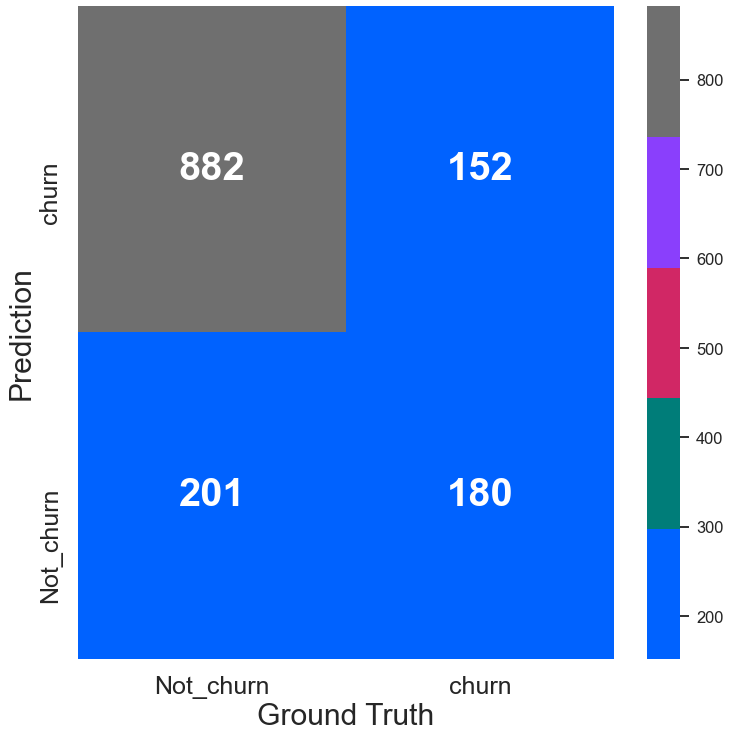

In [540]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Not_churn', 'churn']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

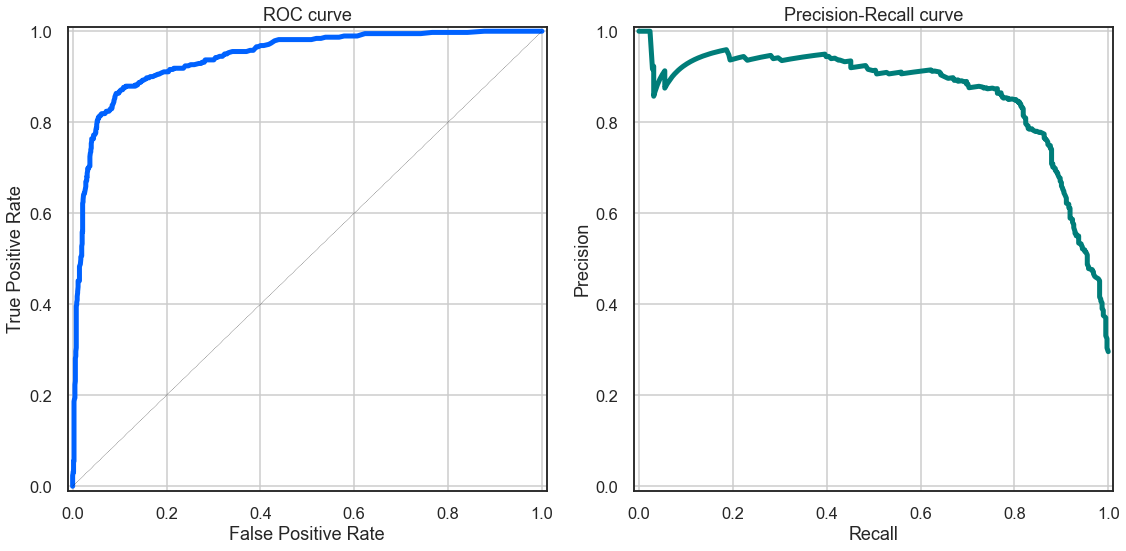

In [541]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [542]:
# Find best K
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

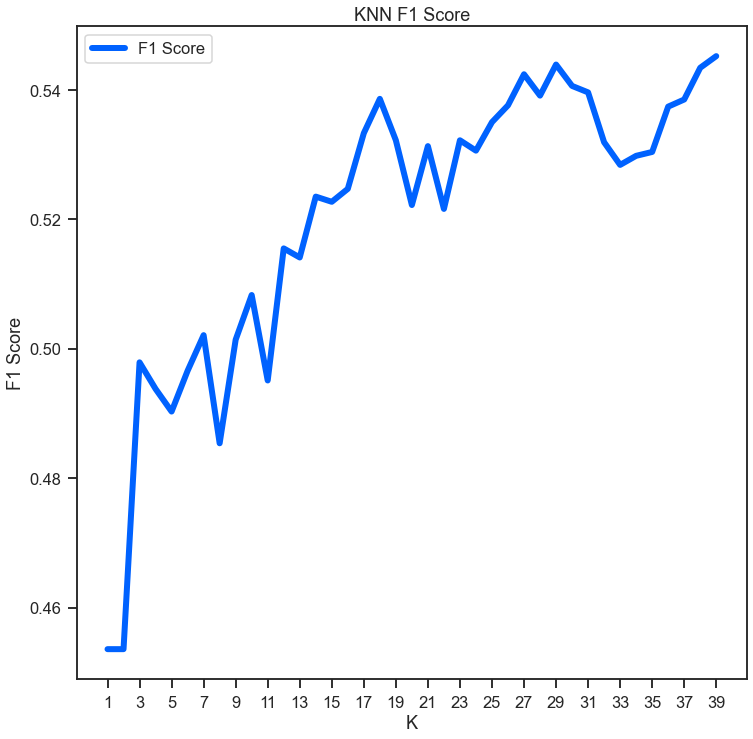

In [543]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

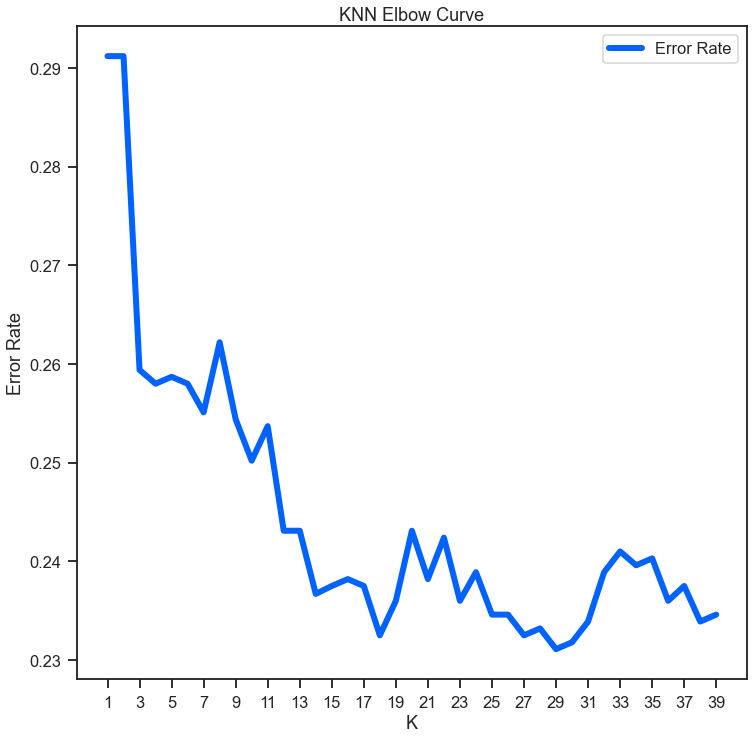

In [544]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(color=colors[0], figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [545]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=29)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1034
           1       0.58      0.52      0.55       381

    accuracy                           0.77      1415
   macro avg       0.71      0.69      0.70      1415
weighted avg       0.76      0.77      0.77      1415

Accuracy score:  0.77
F1 Score:  0.55


In [546]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1034
           1       0.58      0.52      0.55       381

    accuracy                           0.77      1415
   macro avg       0.71      0.69      0.70      1415
weighted avg       0.76      0.77      0.77      1415

   accuracy  precision   recall        f1       auc
0  0.769611   0.580175  0.52231  0.549724  0.691522


Text(0.5, 73.0, 'Ground Truth')

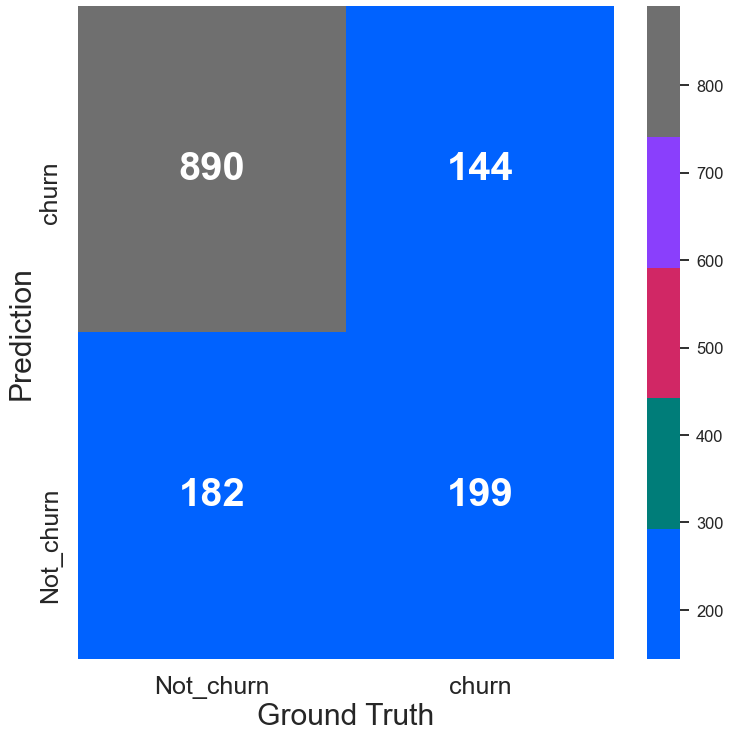

In [452]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Not_churn', 'churn']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

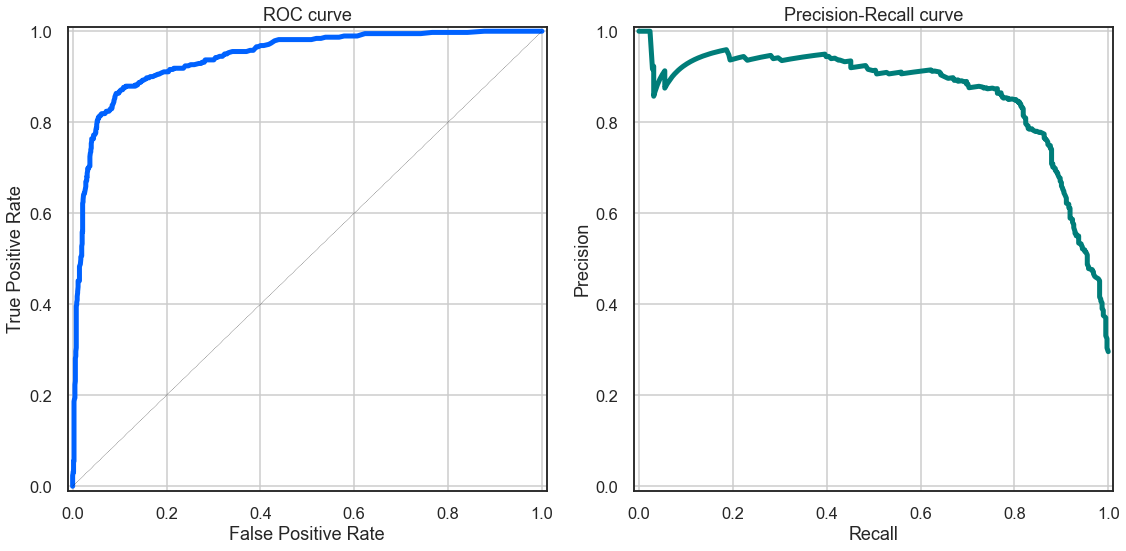

In [453]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

# Logistic Regression

In [363]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import metrics
from sklearn.metrics import log_loss

In [547]:
# Set up X and y variables
y, X = df['churn'], df.drop(columns='churn')
X = preprocessing.StandardScaler().fit(X).transform(X)

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [548]:
y_train.value_counts(normalize=True)

0    0.745523
1    0.254477
Name: churn, dtype: float64

In [549]:
y_test.value_counts(normalize=True)

0    0.730742
1    0.269258
Name: churn, dtype: float64

In [550]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(df[feature_cols], df.churn))

# Create the dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'churn']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'churn']

In [551]:
y_train.value_counts(normalize=True)

0    0.739798
1    0.260202
Name: churn, dtype: float64

In [552]:
y_test.value_counts(normalize=True)

0    0.739171
1    0.260829
Name: churn, dtype: float64

In [553]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [554]:
y_pred = LR.predict(X_test)

In [555]:
y_pred__prob = LR.predict_proba(X_test)

In [556]:
# Use score method to get accuracy of model
score = LR.score(X_test, y_test)
print(score)

0.788135593220339


In [557]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

In [558]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[698  87]
 [138 139]]


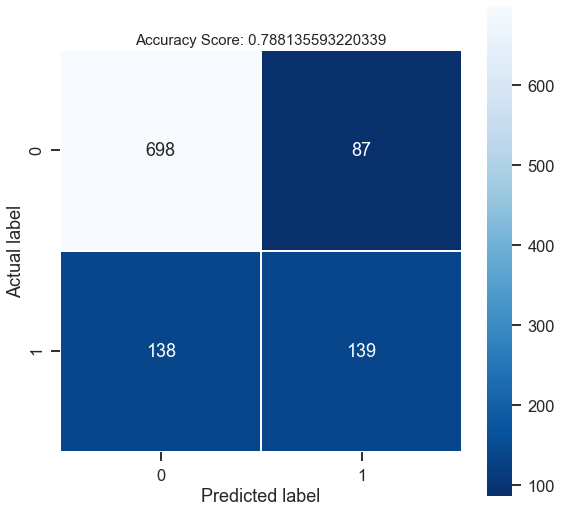

In [559]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [560]:
plt.figure()
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       785
           1       0.62      0.50      0.55       277

    accuracy                           0.79      1062
   macro avg       0.72      0.70      0.71      1062
weighted avg       0.78      0.79      0.78      1062



<Figure size 432x288 with 0 Axes>

In [564]:
# recall & precision
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       785
           1       0.62      0.50      0.55       277

    accuracy                           0.79      1062
   macro avg       0.72      0.70      0.71      1062
weighted avg       0.78      0.79      0.78      1062



In [565]:
# Estimate KNN model and report outcomes
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       785
           1       0.62      0.50      0.55       277

    accuracy                           0.79      1062
   macro avg       0.72      0.70      0.71      1062
weighted avg       0.78      0.79      0.78      1062

Accuracy score:  0.79
F1 Score:  0.55


In [566]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       785
           1       0.62      0.50      0.55       277

    accuracy                           0.79      1062
   macro avg       0.72      0.70      0.71      1062
weighted avg       0.78      0.79      0.78      1062

   accuracy  precision    recall        f1       auc
0  0.788136   0.615044  0.501805  0.552684  0.695489


Text(0.5, 73.0, 'Ground Truth')

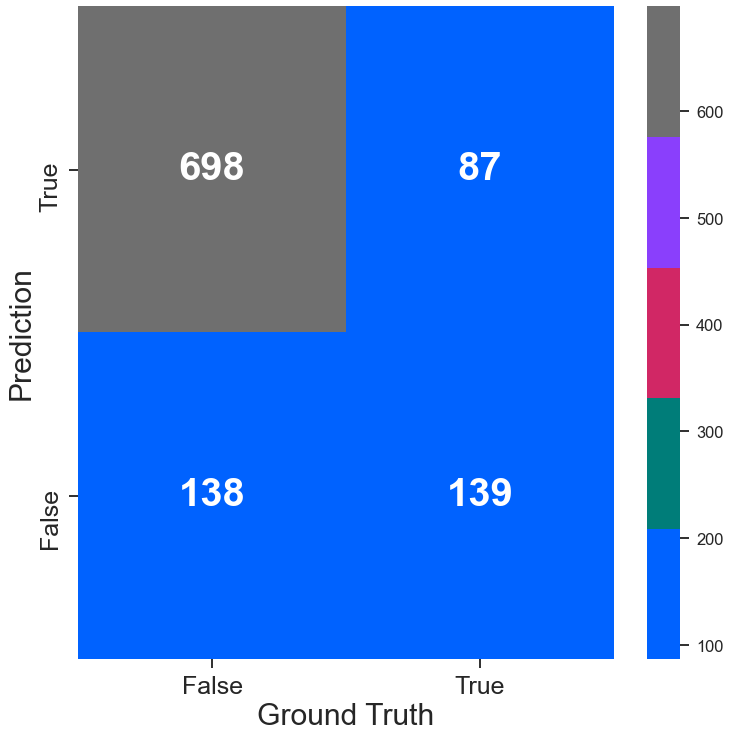

In [567]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [437]:
# Log Loss
log_loss(y_test, yhat_prob)

ValueError: Found input variables with inconsistent numbers of samples: [1415, 1062]

In [438]:
# Calculate the correlation values
feature_cols = df.columns.drop('churn')
corr_values = df[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

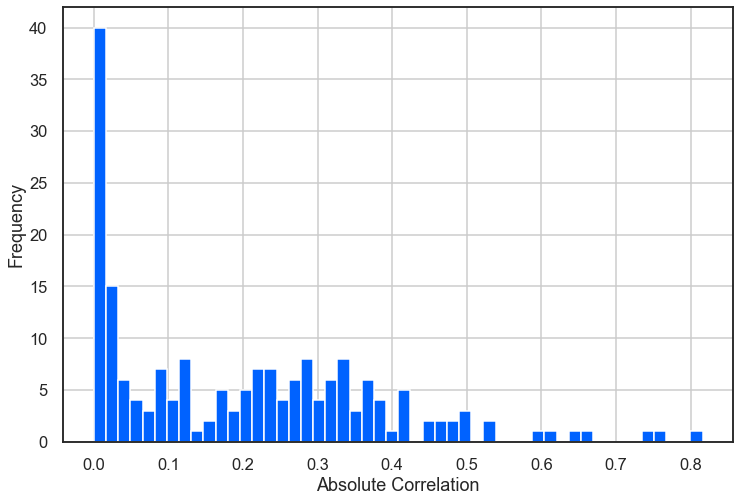

In [439]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [440]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.7')

,feature1,feature2,correlation,abs_correlation
3,tenure,totalCharges,0.816120,0.816120
65,monthlyCharges,internetService_Fiber optic,0.766983,0.766983
66,monthlyCharges,internetService_No,-0.744133,0.744133


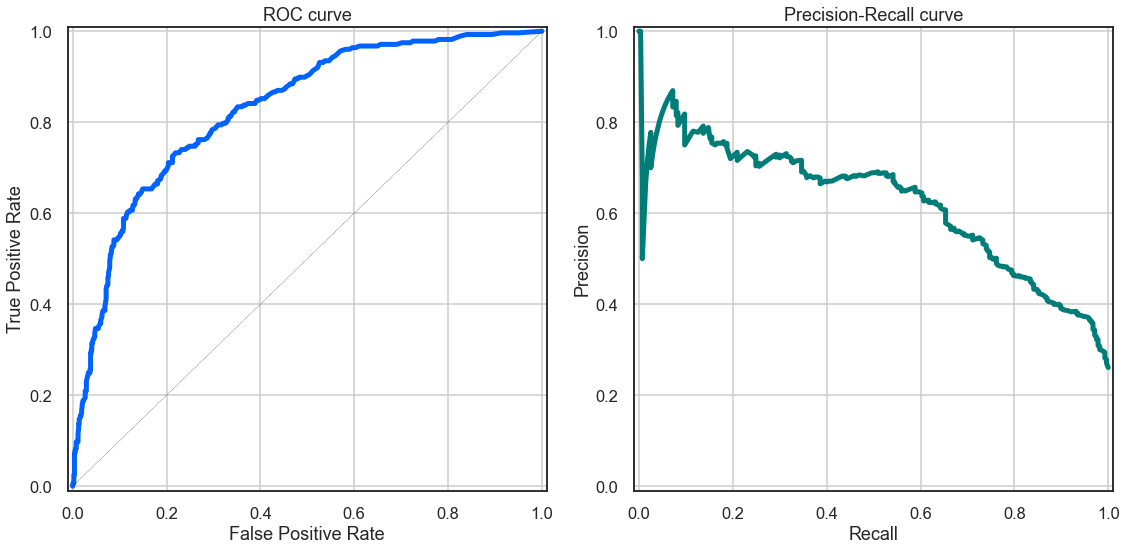

In [441]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

# Bagging

In [568]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
#os.chdir('data')
import datasetup
from datasetup import churndata, colors, labels, palette
sns.set_palette(palette)

In [569]:
filepath = 'churndata_processed.csv'
data = pd.read_csv(filepath)
data.head()

,tenure,contract,paperlessBilling,monthlyCharges,totalCharges,churn,gender,age,phoneService,multipleLines,...,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,internetService_Fiber optic,internetService_No,paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check
0,0.50,0.5,0,0.385075,0.224763,0,1,0.300000,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0.75,0.5,0,0.239303,0.220919,0,1,0.585714,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0.00,0.0,1,0.521891,0.014371,1,0,0.657143,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0.25,0.0,1,0.704975,0.227565,0,1,0.271429,1,1,...,1,0,0,1,0,1,0,1,0,0
4,0.00,0.0,0,0.114428,0.032668,0,0,0.271429,0,0,...,0,0,0,0,0,0,0,0,0,1


In [570]:
round(data.rename(columns=labels).describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
tenure,3537.0,0.45,0.40,0.0,0.00,0.50,0.75,1.0
Contract,3537.0,0.35,0.42,0.0,0.00,0.00,0.50,1.0
paperlessBilling,3537.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0
monthlyCharges,3537.0,0.47,0.29,0.0,0.24,0.50,0.71,1.0
totalCharges,3537.0,0.27,0.26,0.0,0.05,0.17,0.45,1.0
churn,3537.0,0.26,0.44,0.0,0.00,0.00,1.00,1.0
gender,3537.0,0.51,0.50,0.0,0.00,1.00,1.00,1.0
age,3537.0,0.50,0.29,0.0,0.26,0.50,0.74,1.0
phoneService,3537.0,0.91,0.29,0.0,1.00,1.00,1.00,1.0
multipleLines,3537.0,0.43,0.49,0.0,0.00,0.00,1.00,1.0


<AxesSubplot:>

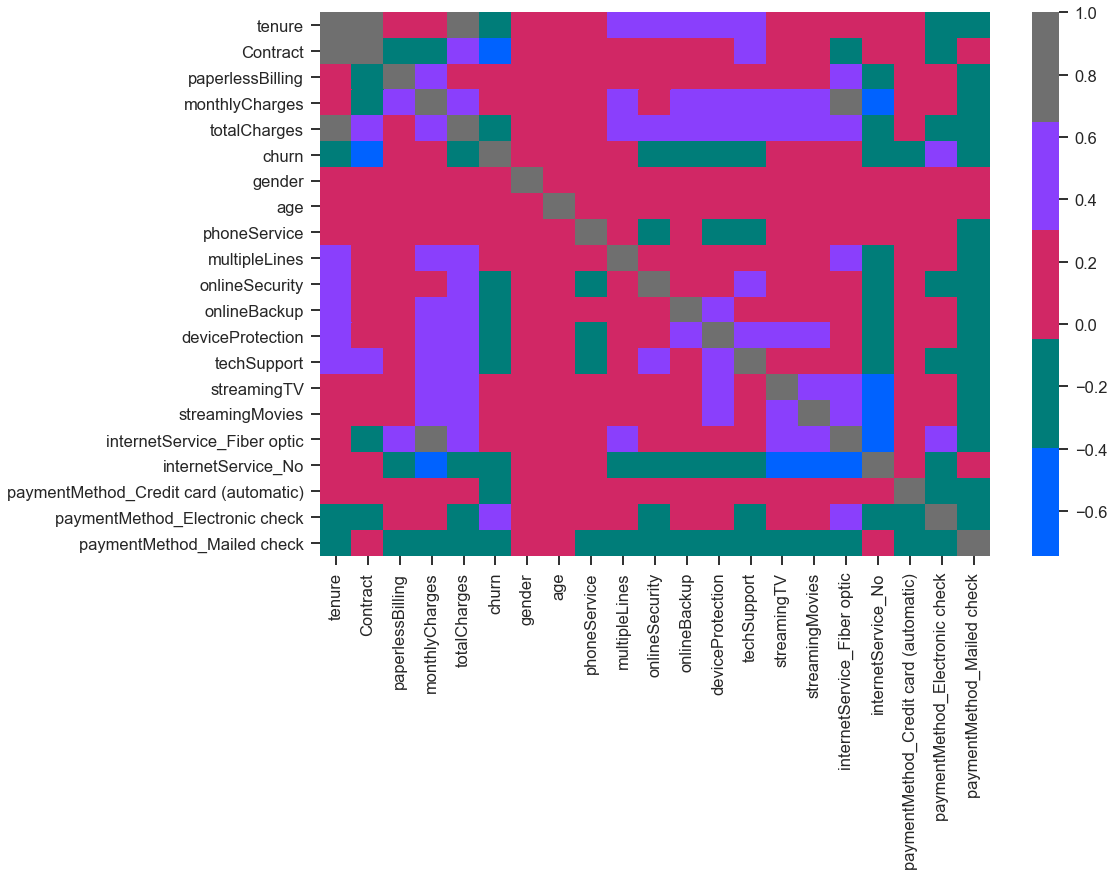

In [571]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.rename(columns=labels).corr(), cmap=colors)

In [572]:
# Data are skewed at ~85% towards non-churned customers
# This will be important to remember when model building
target = 'churn'
data[target].value_counts()

0    2616
1     921
Name: churn, dtype: int64

In [573]:
data[target].value_counts(normalize=True)

0    0.73961
1    0.26039
Name: churn, dtype: float64

In [574]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in data.columns if x != target]

# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data[target]))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target]

In [575]:
y_train.value_counts(normalize=True)

0    0.739813
1    0.260187
Name: churn, dtype: float64

In [576]:
y_test.value_counts(normalize=True)

0    0.739333
1    0.260667
Name: churn, dtype: float64

In [577]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [578]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.223859
20.0,0.213549
30.0,0.208640
40.0,0.210113
50.0,0.206676
100.0,0.205695
150.0,0.208640
200.0,0.204713
300.0,0.202258


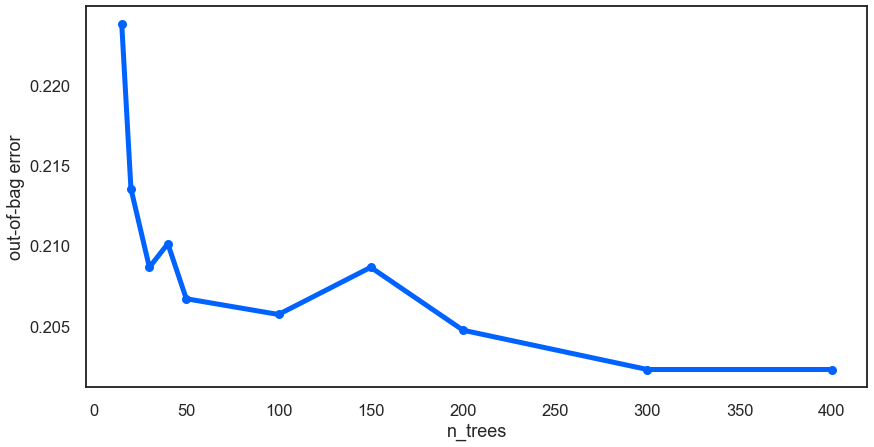

In [579]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [580]:
## Part 4: Extra Trees

from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.240550
20.0,0.229259
30.0,0.218949
40.0,0.215022
50.0,0.209131
100.0,0.216986
150.0,0.210604
200.0,0.210113
300.0,0.213058


In [581]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.223859,0.240550
20.0,0.213549,0.229259
30.0,0.208640,0.218949
40.0,0.210113,0.215022
50.0,0.206676,0.209131
100.0,0.205695,0.216986
150.0,0.208640,0.210604
200.0,0.204713,0.210113
300.0,0.202258,0.213058


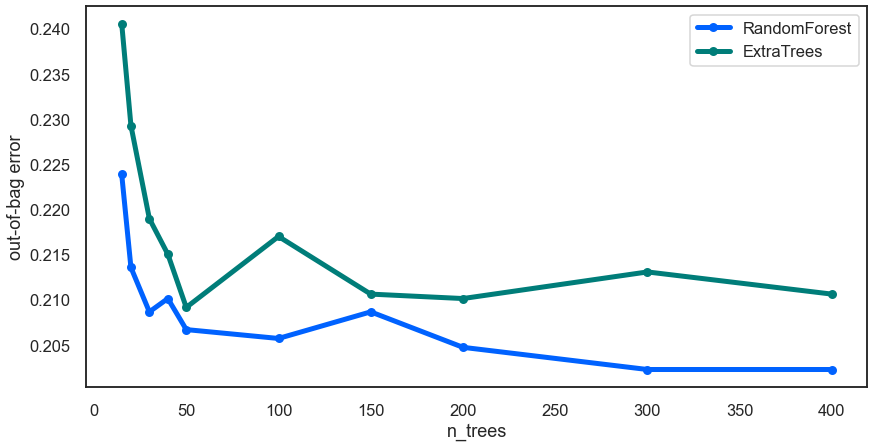

In [582]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [583]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [584]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1109
           1       0.66      0.53      0.59       391

    accuracy                           0.81      1500
   macro avg       0.75      0.72      0.73      1500
weighted avg       0.80      0.81      0.80      1500

   accuracy  precision    recall        f1       auc
0  0.805333   0.656151  0.531969  0.587571  0.716841


Text(0.5, 73.0, 'Ground Truth')

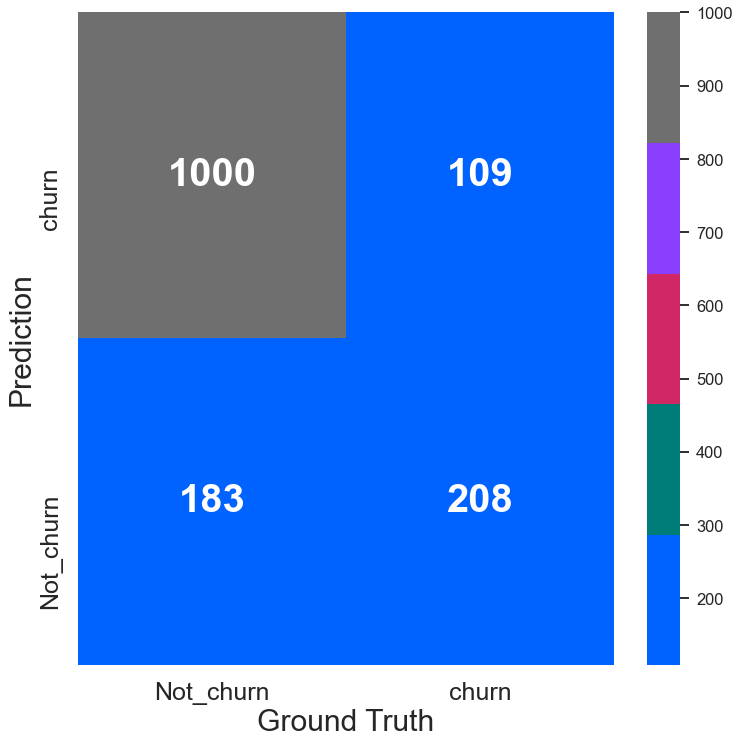

In [585]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['Not_churn', 'churn']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

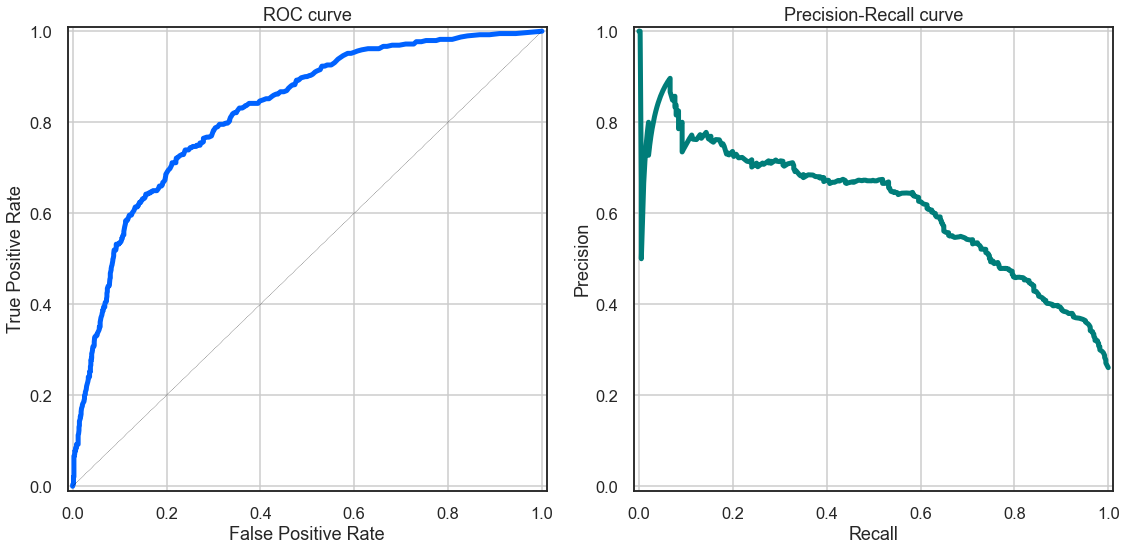

In [586]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

# Most importents Feature

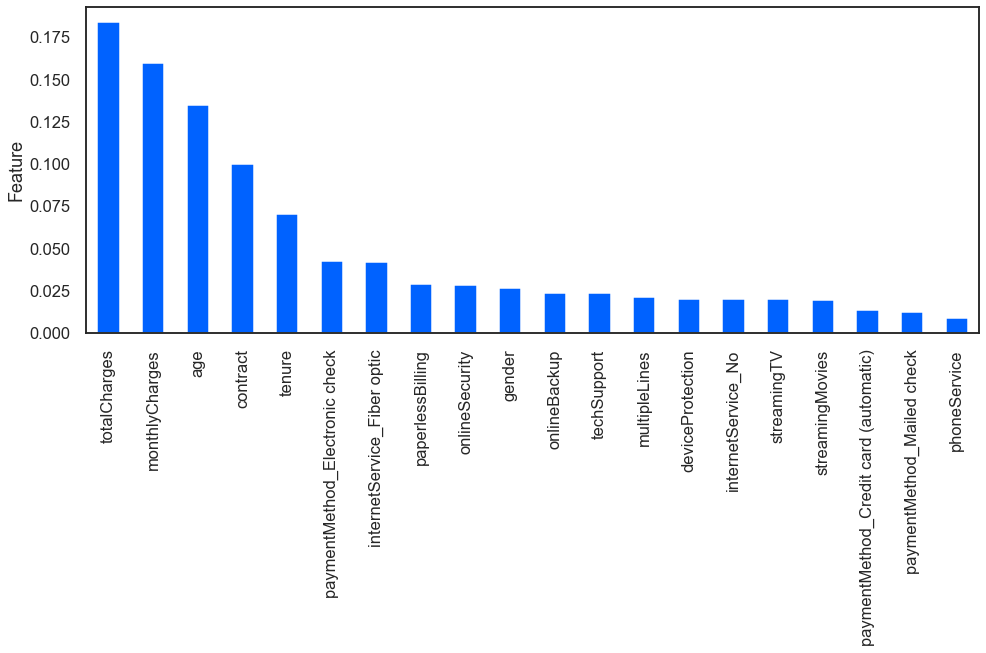

In [587]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

# SVM

In [142]:
filepath = 'churndata_processed.csv'
data = pd.read_csv(filepath)

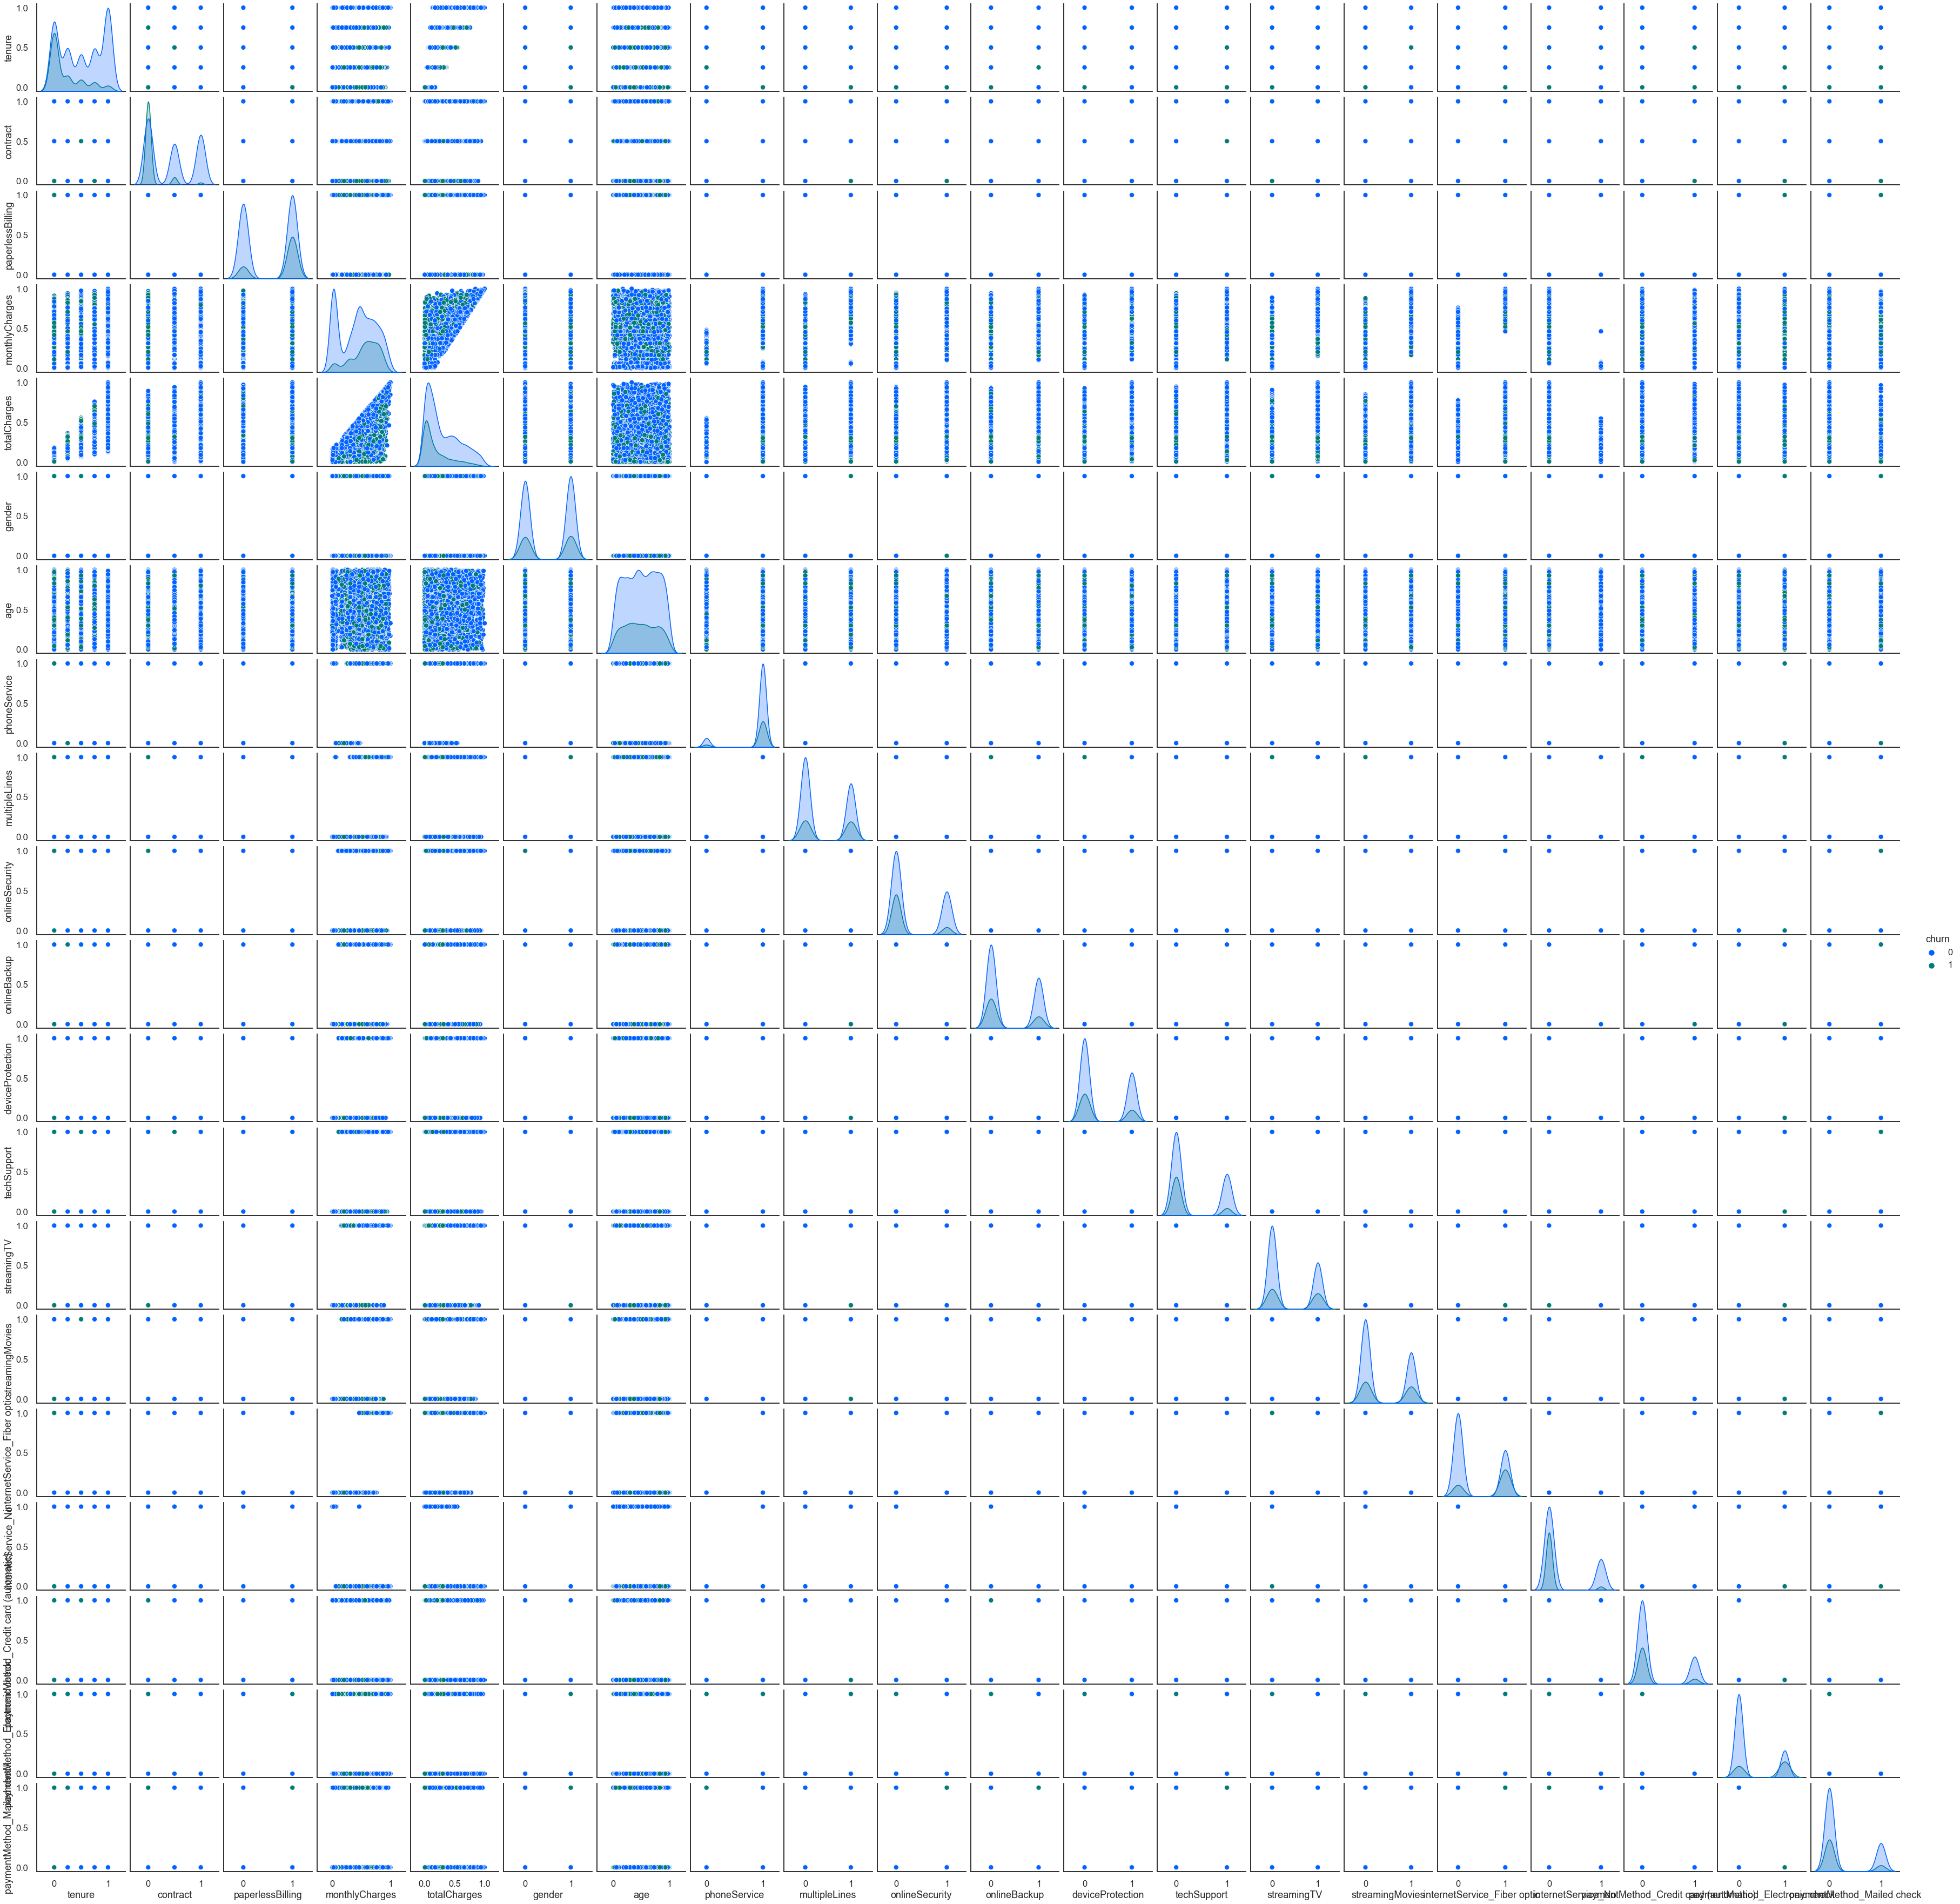

In [136]:
sns.pairplot(data, hue='churn')

In [143]:
# Set up X and y variables
y, X = df['churn'], df.drop(columns='churn')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [144]:
y = y.astype(int)
fields = list(X.columns)  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

contract                                -0.401525
tenure                                  -0.334024
internetService_No                      -0.225040
totalCharges                            -0.201312
onlineSecurity                          -0.178960
techSupport                             -0.168481
paymentMethod_Credit card (automatic)   -0.130902
paymentMethod_Mailed check              -0.096925
onlineBackup                            -0.085234
deviceProtection                        -0.065339
age                                     -0.023209
gender                                  -0.002408
phoneService                             0.019215
streamingMovies                          0.053539
multipleLines                            0.070355
streamingTV                              0.073049
monthlyCharges                           0.185693
paperlessBilling                         0.221520
internetService_Fiber optic              0.301171
paymentMethod_Electronic check           0.313385


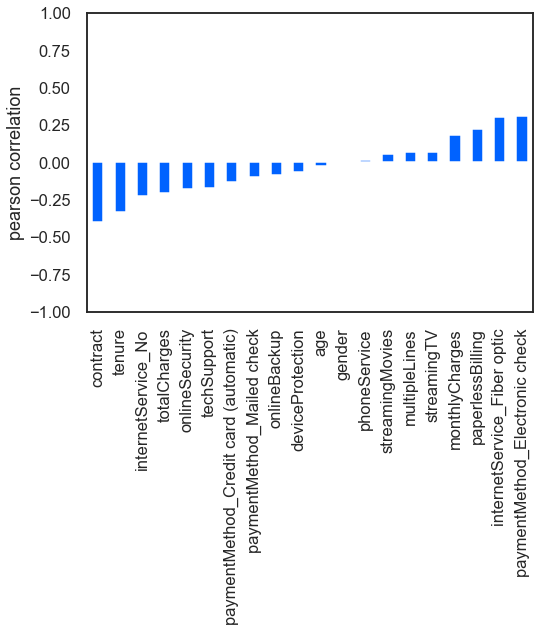

In [145]:
ax = correlations.plot(kind='bar', color=colors[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [146]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['tenure', 'contract'], dtype='object')
Index(['tenure_scaled', 'contract_scaled'], dtype='object')


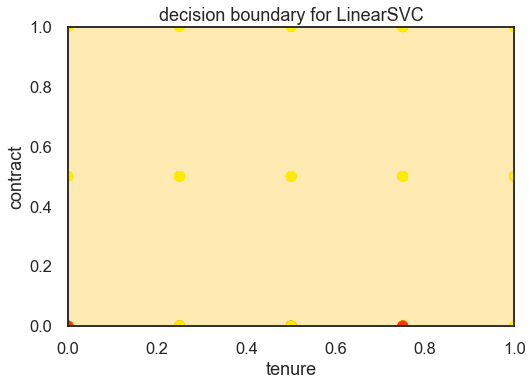

In [147]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

# Decision Tree

In [148]:
filepath = 'churndata_processed.csv'
data = pd.read_csv(filepath)

In [149]:
data.head()

,tenure,contract,paperlessBilling,monthlyCharges,totalCharges,churn,gender,age,phoneService,multipleLines,...,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,internetService_Fiber optic,internetService_No,paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check
0,0.50,0.5,0,0.385075,0.224763,0,1,0.300000,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0.75,0.5,0,0.239303,0.220919,0,1,0.585714,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0.00,0.0,1,0.521891,0.014371,1,0,0.657143,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0.25,0.0,1,0.704975,0.227565,0,1,0.271429,1,1,...,1,0,0,1,0,1,0,1,0,0
4,0.00,0.0,0,0.114428,0.032668,0,0,0.271429,0,0,...,0,0,0,0,0,0,0,0,0,1


In [150]:
# All data columns except for color
feature_cols = [x for x in data.columns if x not in 'churn']

In [151]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 1000 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['churn']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'churn']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'churn']

In [152]:
y_train.value_counts(normalize=True).sort_index()

0    0.739456
1    0.260544
Name: churn, dtype: float64

In [153]:
y_test.value_counts(normalize=True).sort_index()

0    0.74
1    0.26
Name: churn, dtype: float64

In [154]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [155]:
dt.tree_.node_count, dt.tree_.max_depth

(951, 21)

In [157]:
# A function to return error metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [158]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.732000
precision,1.0,0.484848
recall,1.0,0.492308
f1,1.0,0.488550


In [167]:
from sklearn.metrics import mean_squared_error

y_train_pred = GR.predict(X_train)
y_test_pred  = GR.predict(X_test)

train_test_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                                         'test':  mean_squared_error(y_test, y_test_pred)},
                                          name='MSE').to_frame().T

train_test_error

,train,test
MSE,0.187229,0.224


In [159]:
# Use grid search and cross validation
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [160]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(63, 5)

In [164]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [162]:
train_test_gr_error

,train,test
accuracy,0.812771,0.776000
precision,0.713303,0.607143
recall,0.470499,0.392308
f1,0.567001,0.476636


In [168]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr  = GR.predict(X_test)

train_test_gr_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr)},
                                          name='MSE').to_frame().T

train_test_gr_error

,train,test
MSE,0.187229,0.224


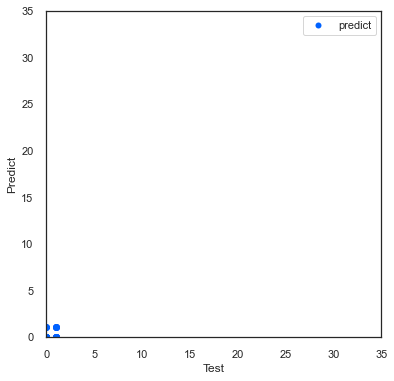

In [169]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));
### END SOLUTION

In [174]:
! pip install pydotplus
! pip install graphviz

In [181]:
from io import StringIO
import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
sys.path.append('C:/Users/usrname/AppData/Local/Continuum/anaconda3/Library/bin/graphviz/')

In [182]:
# Create an output destination for the file
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'churn_tree.png'
graph.write_png(filename)
Image(filename=filename) 

InvocationException: GraphViz's executables not found